In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the dataset
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Preprocessing

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# creating dependent and independent matrix of features
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x))

In [7]:
# scaled df
scaled_df = pd.concat([x, y], axis = 1)

# feature engineering

In [8]:
scaled_df['feature1'] = ((scaled_df[0] + scaled_df[1])**2)/5
scaled_df['feature2'] = ((scaled_df[1]*2.5 + scaled_df[2])**3)/25
scaled_df['feature3'] = ((scaled_df[0]**3) + (scaled_df[1]**2))/10
scaled_df['feature4'] = ((scaled_df[3]**3 + scaled_df[4])*2)/10.5
scaled_df['feature5'] = ((scaled_df[5]*5.7 + scaled_df[6])**2)
scaled_df['feature6'] = (scaled_df[9]*1.5 + (scaled_df[11]*3.6))
scaled_df['feature7'] = ((scaled_df[2]**2 + scaled_df[10])*2)/5
scaled_df['feature8'] = ((scaled_df[6]**3 + scaled_df[7])*7)/2.5
scaled_df['feature9'] = ((scaled_df[7]*3/10) + (scaled_df[8]**2)/5.9)
scaled_df['feature10'] = ((scaled_df[12]*3/11 + scaled_df[4])**2)/10

In [9]:
# checking correlation
correlation = scaled_df.corr()
correlation.sort_values(["target"], ascending = False, inplace = True)
print(correlation.target)

target       1.000000
2            0.434854
7            0.422895
10           0.345512
feature7     0.286388
feature9     0.272164
6            0.134468
feature8     0.129592
feature1     0.121565
feature10    0.016125
feature2    -0.012521
feature5    -0.037262
5           -0.041164
feature3    -0.053560
4           -0.099966
3           -0.138772
feature4    -0.153105
0           -0.229324
1           -0.279501
12          -0.337838
11          -0.382085
8           -0.438029
9           -0.438441
feature6    -0.484560
Name: target, dtype: float64


In [10]:
# feature selection
less_important = ['feature6', 9, 8, 11, 12, 1, 0, 'feature4', 3, 4, 'feature3', 5, 'feature5']
scaled_df.drop(less_important, axis = 1, inplace = True)

In [11]:
# create scaled independent matrix of features
scaled_x = scaled_df.iloc[:, :-1]

# Modeling

In [12]:
# create training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y, test_size = 0.25, random_state = 31)

In [13]:
len(x_train), len(x_test), len(y_train), len(y_test)

(768, 257, 768, 257)

In [14]:
x_train.shape

(768, 10)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 31)
log_clf.fit(x_train, y_train)
print(log_clf.score(x_test, y_test))

1.0


In [16]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       142

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



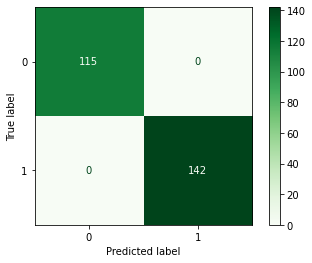

In [17]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_clf, x_test, y_test,
                     cmap=plt.cm.Greens);

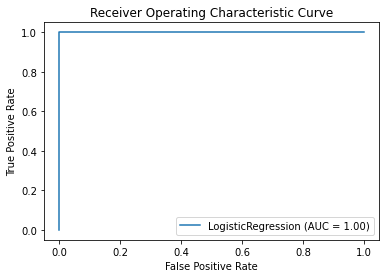

In [18]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
# Parameters taken from grid search best params.
knn_clf = KNeighborsClassifier(algorithm = 'auto',
                               leaf_size = 10,
                               n_neighbors = 2,
                               p = 2)
knn_clf.fit(x_train, y_train)
print(knn_clf.score(x_test, y_test))

0.9688715953307393


In [20]:
from sklearn.metrics import classification_report
y_preds = knn_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       115
           1       1.00      0.94      0.97       142

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



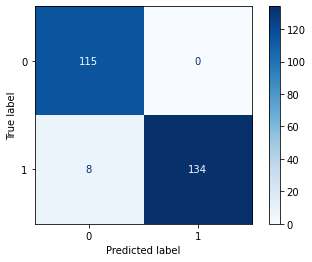

In [21]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_clf, x_test, y_test,
                     cmap=plt.cm.Blues);

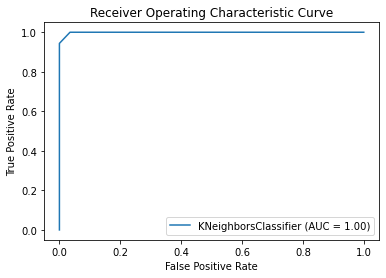

In [22]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# SVC

In [23]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
print(svc_clf.score(x_test, y_test))

1.0


In [24]:
from sklearn.metrics import classification_report
y_preds = svc_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       142

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



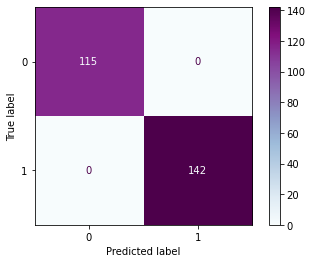

In [25]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc_clf, x_test, y_test,
                     cmap=plt.cm.BuPu);

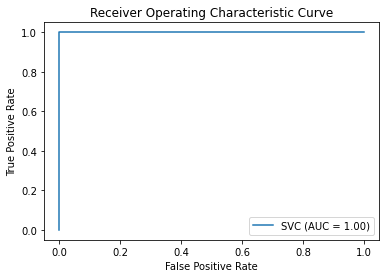

In [26]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(random_state = 31)
rand_clf.fit(x_train, y_train)
print(rand_clf.score(x_test, y_test))

1.0


In [28]:
from sklearn.metrics import classification_report
y_preds = rand_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00       142

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



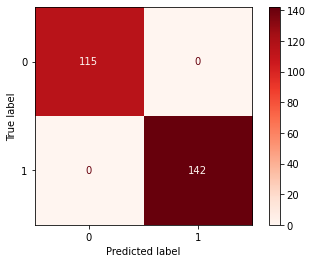

In [29]:
# confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rand_clf, x_test, y_test,
                     cmap=plt.cm.Reds);

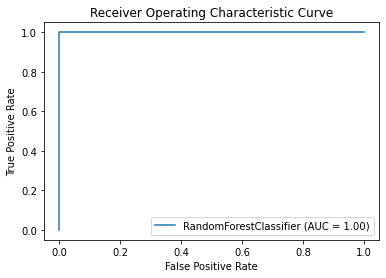

In [30]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rand_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');